In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

The aim of this analysis is to understand the perception between mental health and pyshical health in the work place. It focus on tryign to understnad whether employees feel shame to report any mental or physical issues and whether this issues are perceived the same way by both genders.

The dataset, made available by Open Sourcing Mental Illness, is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

This study focus on the answers given to que following questions: 
benefits: 


- Do you think that discussing a mental health issue with your employer would have negative consequences?

- Do you think that discussing a physical health issue with your employer would have negative consequences?

- Would you be willing to discuss a mental health issue with your coworkers?

- Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- Would you bring up a mental health issue with a potential employer in an interview?

- Would you bring up a physical health issue with a potential employer in an interview?



#### Library and data loading

In [3]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/ana/ironhack_coding/datasets/mental_health_in_tech.csv")

#### Exploring the data

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [7]:
df.shape

(1259, 27)

In [8]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [10]:
# Assuring column names are all lower case and whitespaces are replace by underscores
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [11]:
# Drop NaN values in the self-employed column because it is very low compared with the whole dataset
df = df.dropna(subset=['self_employed'], how='all', inplace=True)

#### Cleaning age column

In [12]:
# age's min and max are outliers and very humanily impossible
df.describe()

,age
count,1.241000e+03
mean,8.058021e+07
std,2.838665e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [13]:
# Removing outliers manually - keeping all age columns where age is between 20 and 75 years old.
# Assigning NaN to all other values, in order to drop these values at a later stage.
df["age"] = df["age"].apply(lambda age: int(age) if (age > 20 and age < 75) else np.nan)


In [14]:
df["age"].min()

21.0

In [15]:
df["age"].max()

72.0

In [16]:
df["age"].isnull().sum()

30

In [17]:
# dropping rows with NaN values in the age column
df = df.dropna(subset=['age'], how='all', inplace=True)
df["age"].isnull().sum()

0

In [18]:
# after rows being dropped
df.shape

(1211, 27)

#### Cleaning gender column


In [20]:
df["gender"].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'Woman', 'f', 'Mal',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Female ',
       'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Man', 'msle', 'Neuter',
       'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [21]:
#Cleaning the "gender" column and making sure most of the values are "male" or "female"
#Other values will be dropped for this analysis, as the number is very small.

df["gender"] = df.gender.apply(lambda x: x.lower().strip())
df["gender"] = df.gender.apply(lambda x: re.sub(r"[m]$","male", x))
df["gender"] = df.gender.apply(lambda x: re.sub(r"[f]$","female", x))


df = df[(df["gender"] == "male") | (df["gender"] == "female")]

df["gender"].value_counts()



male      939
female    230
Name: gender, dtype: int64

#### Quick overview of the dataset

In [ ]:
# Percentage per country
(df.country.value_counts()/df.country.value_counts().sum())*100

In [ ]:
# average age
df.age.mean()

In [ ]:
# percentage women vs men in tech

total_respondents = df["gender"].value_counts().sum()
total_women = df[df["gender"] == "female"].count()[1]
total_men = df[df["gender"] == "male"].count()[1]

percentage_women = (total_women/total_respondents)*100
percentage_men = (total_men/total_respondents)*100
print("women",percentage_women)
print("men", percentage_men)

####  Discussing a Mental or Physical Issue & Negative Consequences


In [24]:
#only columns that have the same type of answers "Yes", "No", "Maybe"
consequence = df[["gender","mental_health_consequence","phys_health_consequence"]]
consequence_f = consequence[consequence["gender"]=="female"]
consequence_m = consequence[consequence["gender"]=="male"]


In [25]:

#Do you think that discussing a MENTAL health issue with your employer would have negative consequences? RATIO
cons_wo_mental = (consequence_f["mental_health_consequence"].value_counts()/total_women*100).sort_values()
cons_m_mental = (consequence_m["mental_health_consequence"].value_counts()/total_men*100).sort_values()


#phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative 
#consequences? RATIO

cons_wo_phy = (consequence_f["phys_health_consequence"].value_counts()/total_women*100).sort_values()
cons_m_phy = (consequence_m["phys_health_consequence"].value_counts()/total_men*100).sort_values()


<Figure size 1080x720 with 0 Axes>

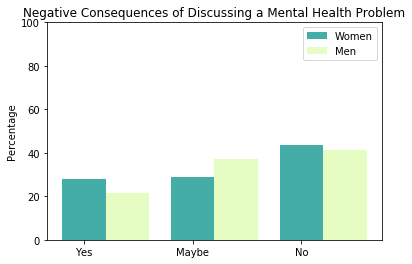

In [89]:
###MEN AGAINST WOMEN - MENTAL Issues
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,cons_wo_mental, width, label = "Women", color="#45ADA8" )
ax2 = ax.bar(ind + width, cons_m_mental, width, label = "Men", color = "#E5FCC2")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Negative Consequences of Discussing a Mental Health Problem')
ax.set_ylim(0,100)
ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

<Figure size 1080x720 with 0 Axes>

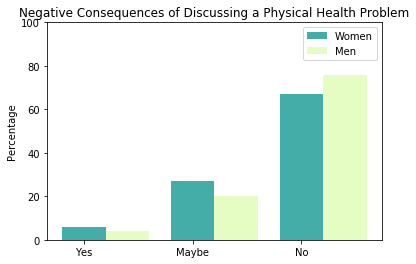

In [29]:
###TEST   MEN AGAINST WOMEN - PHYSICAL
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,cons_wo_phy, width, label = "Women", color="#45ADA8" )
ax2 = ax.bar(ind + width, cons_m_phy, width, label = "Men", color = "#E5FCC2")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Negative Consequences of Discussing a Physical Health Problem')
ax.set_ylim(0,100)
ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

#### Mentioning a mental or physical issue in an interview?

In [30]:

interview = df[["gender","mental_health_interview", "phys_health_interview"]]

interview_f = interview[interview["gender"]=="female"]
interview_m = interview[interview["gender"]=="male"]

#Would you bring up a mental issue with a potential employer in an interview? 
interview_wo_mental = (interview_f["mental_health_interview"].value_counts()/total_women*100).sort_values()
interview_m_mental = (interview_m["mental_health_interview"].value_counts()/total_men*100).sort_values()


#phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative 
#consequences? RATIO

interview_wo_phy = (interview_f["phys_health_interview"].value_counts()/total_women*100).sort_values()
interview_m_phy = (interview["phys_health_interview"].value_counts()/total_men*100).sort_values()


<Figure size 1080x720 with 0 Axes>

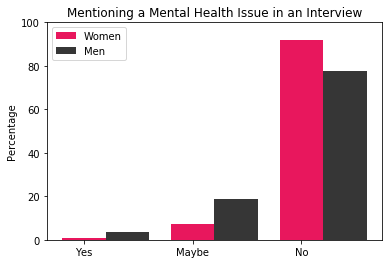

In [31]:
#MENTAL PROBLEM


#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,interview_wo_mental, width, label = "Women", color="#E8175D" )
ax2 = ax.bar(ind + width, interview_m_mental, width, label = "Men", color = "#363636")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Mentioning a Mental Health Issue in an Interview')
ax.set_ylim(0,100)
ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

<Figure size 1080x720 with 0 Axes>

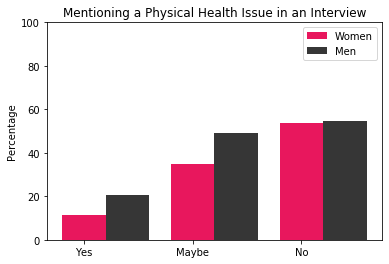

In [32]:
### PYSHICAL PROBLEM


#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "Maybe","No"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

#WOMEN - behaviour facing mental vs physical disease 
fig, ax = plt.subplots()
ax1 = ax.bar(ind,interview_wo_phy, width, label = "Women", color="#E8175D" )
ax2 = ax.bar(ind + width, interview_m_phy, width, label = "Men", color = "#363636")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Mentioning a Physical Health Issue in an Interview')

ax.set_xticks(ind)
ax.set_ylim(0,100)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

#### Talking to a coworker / supervisor

In [53]:
speaking = df[["gender","coworkers", "supervisor"]]

speaking_f = speaking[speaking["gender"]=="female"]
speaking_m = speaking[speaking["gender"]=="male"]

#Would you speak to a co-worker or a supervisor - WOMEN?
coworker_wo = (speaking_f["coworkers"].value_counts()/total_women*100).sort_values()
supervisor_wo = (speaking_f["supervisor"].value_counts()/total_women*100).sort_values()

# Would you speak to a co-worker or a supervisor - MEN ?
coworker_m = (speaking_m["coworkers"].value_counts()/total_men*100).sort_values()
supervisor_m = (speaking_m["supervisor"].value_counts()/total_men*100).sort_values()

<Figure size 1080x720 with 0 Axes>

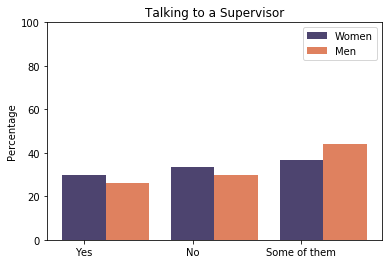

In [54]:
#TALKING TO A SUPERVISOR WOMEN-VS MEN
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "No","Some of them"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

# WOMEN - SPEAKING TO COWORKER or SUPERVISOR
fig, ax = plt.subplots()
ax1 = ax.bar(ind, supervisor_wo, width, label = "Women", color="#4D446F" )
ax2 = ax.bar(ind + width, supervisor_m , width, label = "Men", color = "#DF815F")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Talking to a Supervisor')
ax.set_ylim(0,100)
ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

<Figure size 1080x720 with 0 Axes>

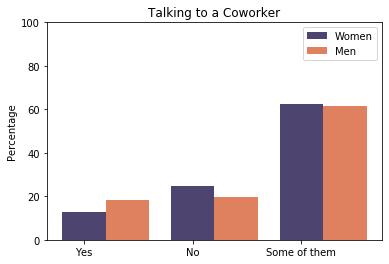

In [55]:
#TALKING TO A COWORKER WOMEN-VS MEN
#number of pairs of bars:
n = 3

#position of bars on x-axis

labels =["Yes", "No","Some of them"]

ind = np.arange(len(labels))

fig = plt.figure(figsize=(15, 10))

width = 0.4 #widht of the bars

# WOMEN - SPEAKING TO COWORKER or SUPERVISOR
fig, ax = plt.subplots()
ax1 = ax.bar(ind, coworker_wo, width, label = "Women", color="#4D446F" )
ax2 = ax.bar(ind + width, coworker_m , width, label = "Men", color = "#DF815F")


# customising 
ax.set_ylabel('Percentage')
ax.set_title('Talking to a Coworker')
ax.set_ylim(0,100)
ax.set_xticks(ind)
ax.set_xticklabels(labels)


ax.legend()

plt.show()

#### OTHER - Are employees in companies that offer mental health benefits less afraid / ashamed of talking about mental health issues?

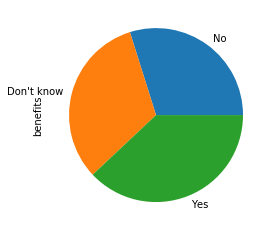

In [44]:
total_companies = df["benefits"].value_counts().sum()
benefits = (df["benefits"].value_counts() /total_companies*100).sort_values()

#Total companies offering mental health benefits

benefits.plot(kind="pie") #add actual percentage

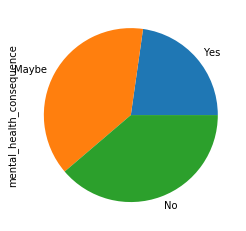

In [45]:
consequence = df[["gender","mental_health_consequence"]]
#consequence_yes = (consequence[consequence["mental_health_consequence"]=="Yes"].value_counts()/total_companies*100).sort_values()

consequence = (consequence["mental_health_consequence"].value_counts()/total_companies*100).sort_values()
consequence.plot(kind="pie") # add actual percentage